<h1 align="right"> Asignación 1 </h1>

<h2 align="right"> Integrantes: </h2>
<div align="right"> Brayan Amorocho<br> Camilo Andrés Cadena <br> Nicolás Mantilla</div>

<h1 align="center">1. Distribuciones y Normalidad</h1>

En este Jupyter Notebook se modela una muestra de datos de presión arterial sistólica para una persona sana, con valores comprendidos entre 115 mmHg y 125 mmHg, por medio de tres muestras tomadas de tres variables aleatorias X1, X2 y X3, cada una con una distribución estadística diferente. Determinar la normalidad para cada muestra.

+ [Worked Example 2019](https://drive.google.com/file/d/1oucWfDP2BVa5et_gOOYJsVSvo8rq5n6M/view).

+ ¿Por qué es importante probar la normalidad de los datos? [Ver prueba de normalidad en Wikipedia (en Inglés)](https://en.wikipedia.org/wiki/Normality_test).

## 1. Cargar librerías

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 2. Obtención de las muestras a partir de las aleatorias X1, X2, X3

In [27]:
N = 2000
xMin = 115 # mmHg
xMax = 125 # mmHg

xMean = 120 # mmHg
xVar  =   5 # mmHg

In [28]:
x1 = np.random.uniform(low=xMin, high=xMax, size=N)
x2 = np.random.normal(loc=xMean, scale=xVar/2.0, size=N)
x3 = np.random.poisson(size=N)
x3 = (x3 - x3.mean()) + xMean

x1 = np.round(x1, decimals=2)
x2 = np.round(x2, decimals=2)
x3 = np.round(x3, decimals=2)

data = pd.DataFrame({'X1':x1, 'X2':x2, 'X3':x3})
k = 0
Nk = len(data.columns)

In [29]:
data

,X1,X2,X3
0,121.45,115.06,121.99
1,118.69,120.22,120.99
2,122.02,121.63,118.99
3,115.28,119.34,119.99
4,121.51,124.26,118.99
...,...,...,...
1995,122.42,118.30,118.99
1996,120.72,120.51,119.99
1997,116.50,122.72,118.99
1998,121.00,120.51,122.99


## 3. Gráfica de los datos y sus diagramas de frecuencia

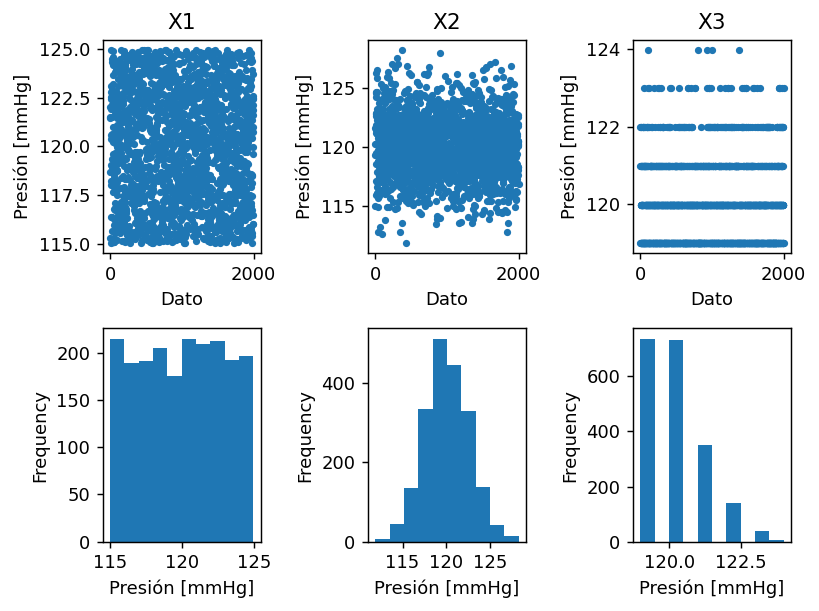

In [30]:
plt.figure(dpi=130)
for c in data.columns:
    k += 1
    plt.subplot(2,Nk,k)
    ax = data[c].plot(style='.')
    ax.set_xlabel('Dato')
    ax.set_ylabel(u'Presión [mmHg]')
    plt.title(c)

    plt.subplot(2,Nk,k+Nk)
    ax = data[c].plot.hist()
    ax.set_xlabel(u'Presión [mmHg]')
    plt.tight_layout()
k=0

## 4. Pruebas de normalidad
Al observar las gráficas y los valores obtenidos de la prueba Shapiro-Wilk, para N = 100, se puede concluir que la muestra tomada de X2 se podría describir por una distribución normal mientras que las otras dos variables, no.

In [31]:
for c in data.columns:
    print('---')
    print(c)
    # Shapiro-Wilk -> W and pvalue #
    SW = stats.shapiro(data[c])
    print('\tShapiro -Wilk test')
    print('\t  W:', SW[0])
    print('\t  p:', SW[1])
    # Kolmogorov–Smirnov -> statistic & pvalue#
    KS = stats.ks_1samp(data[c], stats.norm.cdf)
    print('\tKolmogorov–Smirnov test')
    print('\t  Statistic:', KS.statistic)
    print('\t  p:', KS.pvalue)
    # KS = stats.kstest(data[c],'norm')
    # print('\tKolmogorov–Smirnov test')
    # print('\t  Statistic:', KS.statistic)
    # print('\t  p:', KS.pvalue)
    # Anderson–Darling #
    AD = stats.anderson(data[c], dist='norm')
    print('\tAnderson–Darling test')
    print('\t  Statistic:', AD.statistic)
    print('\t  Critical values:', AD.critical_values)
    print('\t  Significance level:', AD.significance_level)

---
X1
	Shapiro -Wilk test
	  W: 0.9549762606620789
	  p: 2.286259715002074e-24
	Kolmogorov–Smirnov test
	  Statistic: 1.0
	  p: 0.0
	Anderson–Darling test
	  Statistic: 22.051977762919933
	  Critical values: [0.575 0.655 0.785 0.916 1.09 ]
	  Significance level: [15.  10.   5.   2.5  1. ]
---
X2
	Shapiro -Wilk test
	  W: 0.9991133213043213
	  p: 0.44908443093299866
	Kolmogorov–Smirnov test
	  Statistic: 1.0
	  p: 0.0
	Anderson–Darling test
	  Statistic: 0.475427597130647
	  Critical values: [0.575 0.655 0.785 0.916 1.09 ]
	  Significance level: [15.  10.   5.   2.5  1. ]
---
X3
	Shapiro -Wilk test
	  W: 0.834885835647583
	  p: 2.186726253578877e-41
	Kolmogorov–Smirnov test
	  Statistic: 1.0
	  p: 0.0
	Anderson–Darling test
	  Statistic: 121.48305134532438
	  Critical values: [0.575 0.655 0.785 0.916 1.09 ]
	  Significance level: [15.  10.   5.   2.5  1. ]


## 5. Preguntas de autoexplicación

#### 5.1. Para el caso de estudio, escriba la hipótesis nula necesaria para aplicar las pruebas estadísticas de normalidad. Se sugiere leer la documentación de las pruebas referidas en este Jupyter Notebook.  

* **Shapiro-Wilk:** La muestra tomada proviene de una distribución normal.
* **Kolmogorov-Smirnov:** La muestra proviene de una distribución de referencia, en este caso normal, de ahí el argumento "norm" del metodo kstest de la libreria scipy.stats.
* **Anderson-Darling:** Los datos siguen una distribución específicada, en este caso la normal, de ahí el argumento dist="norm".


#### 5.2. Cada una de las pruebas estadísticas de normalidad tienen unos parámetros estadísticos, entre ellos suele aparecer el p-value. Con sus propias palabras, describa el propósito del p-value y cómo se utiliza para aceptar o rechazar una hipótesis nula.

De acuerdo con la ASA (American Statistical Association) en [Statement on p-values](https://www.amstat.org/asa/files/pdfs/P-ValueStatement.pdf), el p-value refleja qué tan incompatibles son los datos con el modelo estadístico considerado. Para nuestro propósito, al querer evaluar si los datos no siguen una distribución normal, comparamos el valor p con un nivel de significancia predefinido. Por lo general, un nivel de significancia de 0.05 se considera apropiado, lo que implica un riesgo del 5% de concluir incorrectamente que los datos no siguen una distribución normal, cuando en realidad sí lo hacen.

**Cuando el valor p es menor o igual a $\alpha$:** Los datos no siguen una distribución normal. Si el valor p es menor que o igual al nivel de significancia, la decisión es rechazar la hipótesis nula y concluir que los datos no siguen una distribución normal.


**Cuando el valor p es mayor que $\alpha$:** No se puede concluir que los datos no siguen una distribución normal. Si el valor p es mayor que el nivel de significancia, la decisión es que no se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que los datos no siguen una distribución normal.

#### 5.3. Describa, para las pruebas estadísticas de normalidad referidas en este Jupyter Notebook, el significado y cómo se utilizan los parámetros de salida de las mismas para determinar si la muestra se puede describir por una distribución normal.

* **Shapiro-Wilk:** El estadístico W es una medida de la "normalidad" de los datos empleados, el cual se calcula mediante los datos, su media y constantes derivadas de la covarianza, varianza y media de una muestra normalmente distribuida del mismo tamaño. Por otro lado, en la respuesta anterior se especificó el propósito del valor p.
* **Kolmogorov-Smirnov:** El estadístico del kstest cuantifica la distancia máxima entre las funciones de densidad acumulada teórica y empiríca, es decir, entre mayor sea el estadístico, peor describe la distribución teórica a los datos observados. Por otro lado, en la respuesta anterior se especificó el propósito del valor p.
* **Anderson-Darling:**  El estadístico de esta prueba se calcula utilizando una distancia ponderada según una función específica de la función de distribución acumulada teórica. Los valores críticos, que varían según la distribución teórica seleccionada, establecen el umbral mínimo para el estadístico, según el nivel de significancia, para determinar si se rechaza la hipótesis nula.

#### 5.4. Describa cómo al aumentar el número de datos de la muestra cambia el resultado de la prueba de normalidad y las gráficas.

Con un aumento en el número de datos de la muestra, se observa una mayor similitud entre los gráficos y sus distribuciones teóricas correspondientes. Esto se refleja en los resultados de las pruebas de normalidad, donde, a excepción del kstest que mantiene valores constantes de 1 y 0 para el estadístico y el valor p en cada muestra de datos, se vuelven más pronunciadas las decisiones de rechazar la hipótesis nula para las muestras uniformes y de Poisson, mientras que se mantiene la tendencia de no rechazar la hipótesis nula para la muestra normal.

<h1 align="center">2. Variables Aleatorias y el Teorema del Límite Central</h1>


Con este Jupyter Notebook se estudiará el [teorema del límite central](https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central) a partir de un ejemplo resuelto.

## 1. Cargar librerías

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 2. Distribución de Poisson y Límite Central

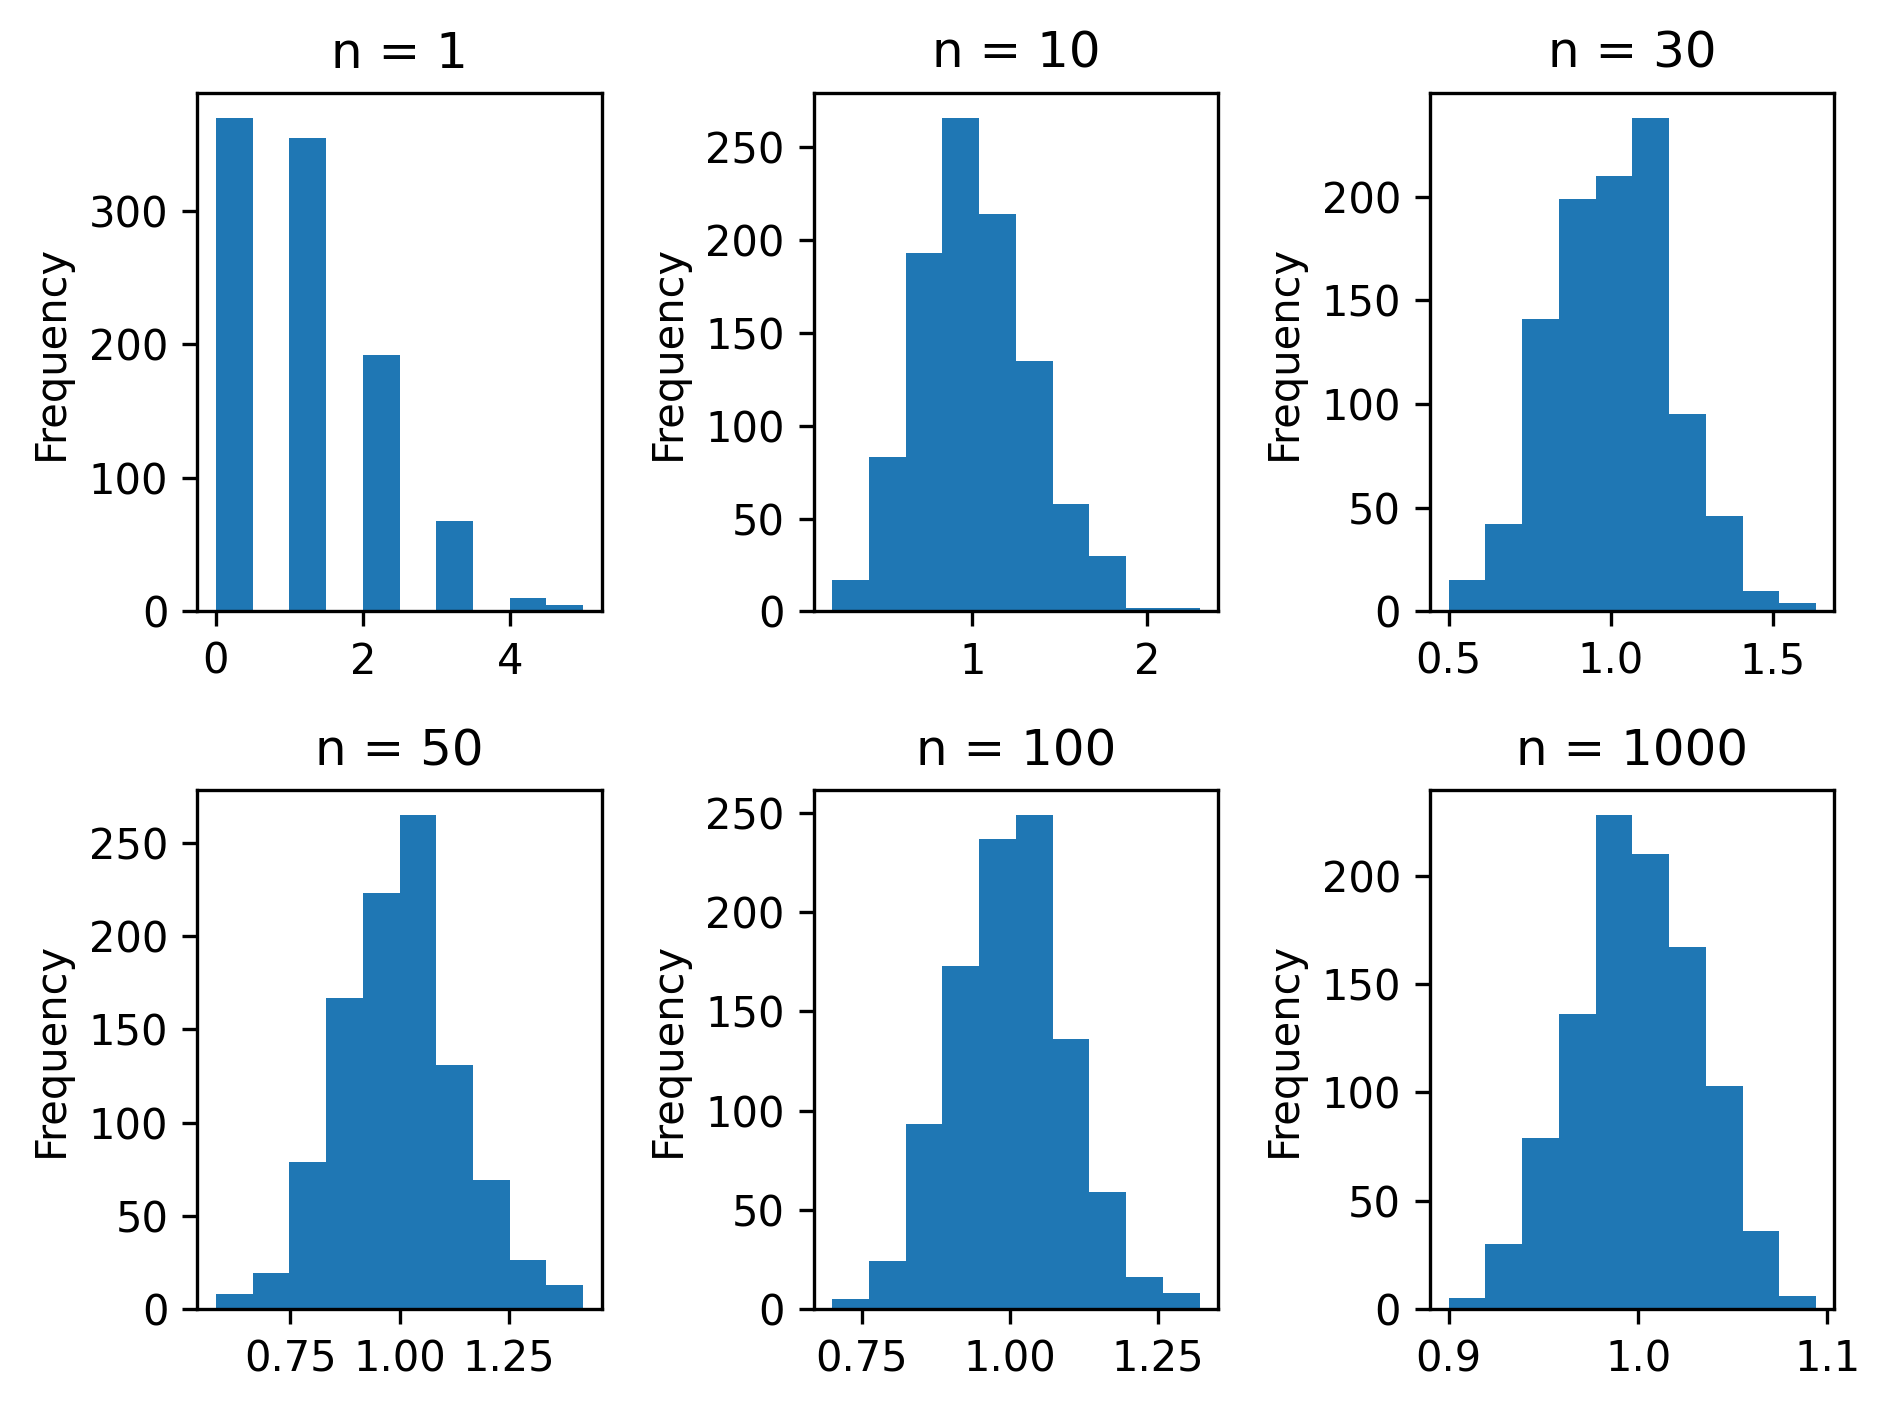

In [46]:
N = 1000
data = pd.DataFrame([])
sizes = [1, 10, 30, 50, 100, 1000]
ks = 0
plt.figure(dpi=300)
for n in sizes:
    ks += 1
    nStr = 'n = ' +  str(n)
    Xbar = []
    for k in range(N):
        Xbar.append(np.average(np.random.poisson(size=n)))
    data[nStr] = Xbar
    plt.subplot(2,3,ks)
    data[nStr].plot.hist()
    plt.title(nStr)
plt.tight_layout()

## 3. Preguntas de autoexplicación

3.1. Describa cómo se obtienen las figuras del ítem 2 e interprete dichas figuras en términos del teorema del límite central.

3.2. Seleccione una prueba de normalidad y verifique si cada muestra se puede representar o no por una distribución normal.

3.3. Obtenga figuras similares a las del ítem 2 con dos distribuciones estadísticias diferentes a la normal y la de Poisson.

3.4. Interprete los resultados obtenidos en el ítem 2. en términos del teorema del límite central.  Se sugiere aplicar prueba de normalidad.

## Solución:

#### 3.1 Describa cómo se obtienen las figuras del ítem 2 e interprete dichas figuras en términos del teorema del límite central.

Se toman 1000 valores del promedio de $n$ mediciones de una variable aleatoria que sigue la distribución de Poisson, $n$ se varia para observar el comportamiento que toma la distribución, donde se observa que a medida que aumenta $n$ la distribución se va aproximando más a una Gaussiana lo que predice el teorema del limite central.


#### 3.2 Seleccione una prueba de normalidad y verifique si cada muestra se puede representar o no por una distribución normal

Luego de realizar las pruebas de normalización se observa como aunque fluctua el comportamineto de valor $p$ para valores relativamente cercanos, cuando estan alejados lo suficiente se evidencia un aumento, siendo el caso $n = 1000$ donde se evidencia que para todas las distribuciones $p > 0.05$ lo que indica que se podría asumir la distribución observada como normal.

#### 3.3 Obtenga figuras similares a las del ítem 2 con dos distribuciones estadísticias diferentes a la normal y la de Poisson.

Aplicando el teorema de límite central, se puede demostrar que la suma de variables aleatorias independientes y con distribución diferente a la normal, se aproxima a una distribución normal. En este caso, además de la distribución de Poisson, se puede utilizar la distribución binomial y la distribución exponencial.



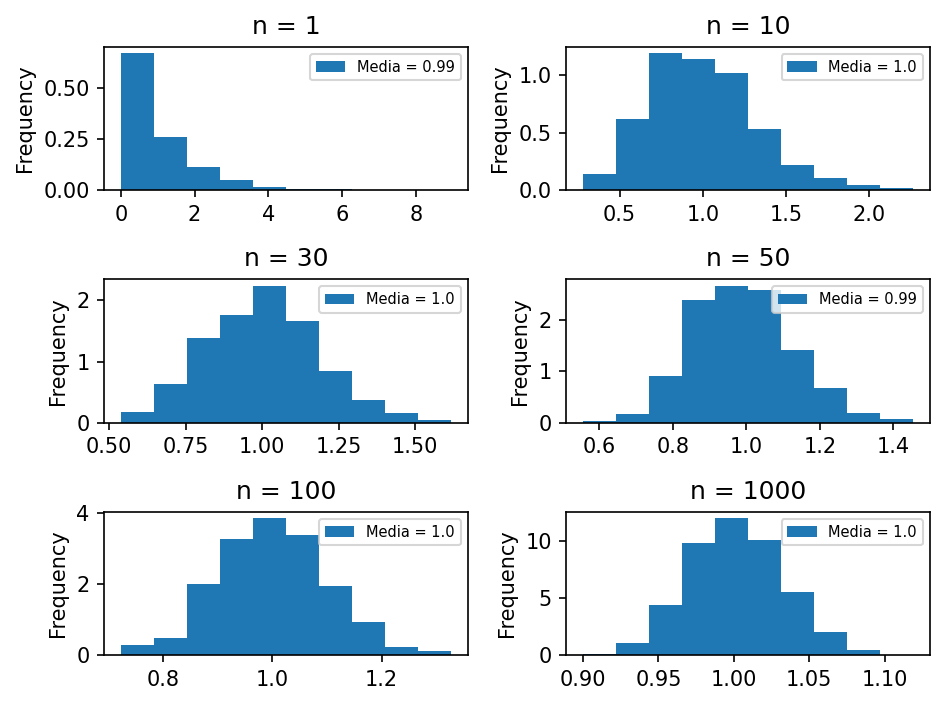

In [47]:
# Realicemos el mismo procedimiento para la distribución exponencial
N = 1000
sizes = [1, 10, 30, 50, 100, 1000]


data_binomial = pd.DataFrame([])
ks = 0
plt.figure(dpi=150)
for n in sizes:
    ks +=1
    nStr = "n = " + str(n)
    Xbar = []
    for k in range(N):
        x = np.random.exponential(size=n)
        Xbar.append(np.average(x))
    data_binomial[nStr] = Xbar
    plt.subplot(3,2,ks)
    data_binomial[nStr].plot.hist(label="Media = " + str(round(data_binomial[nStr].mean(),2)), density=True)
    plt.legend(loc="upper right", fontsize=7)
    plt.title(nStr)
plt.tight_layout()

En este caso, notamos que se trata de una distribución exponencial con una media cercana a 1 y un total de 1000 observaciones. Es evidente que a medida que aumenta el número de muestras, la distribución de la suma de las variables aleatorias tiende a aproximarse a una distribución normal.

A continuación, procederemos a analizar una distribución hipergeométrica.

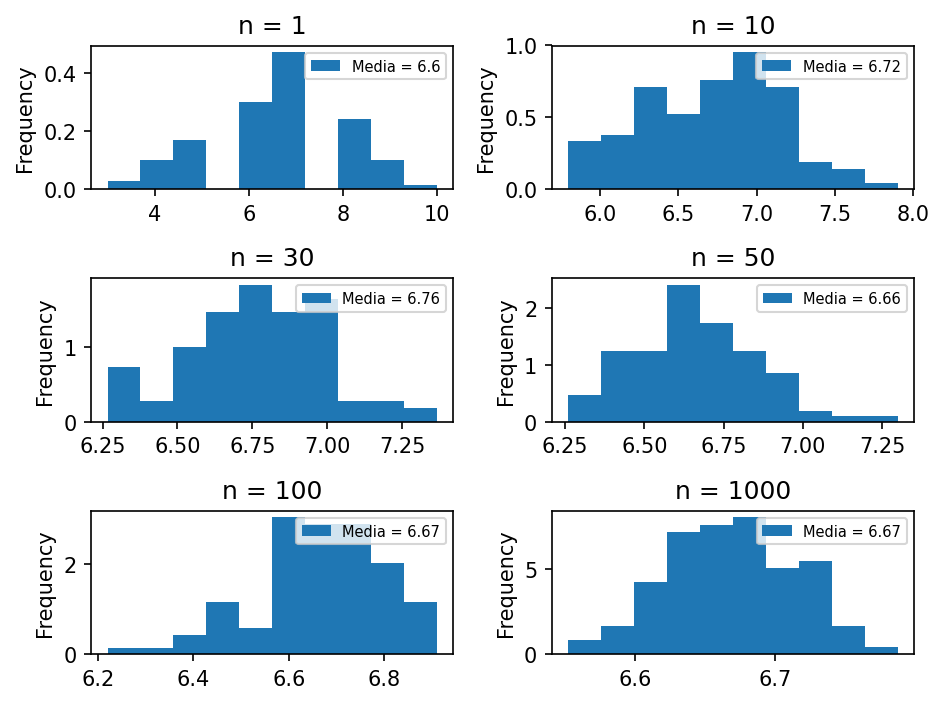

In [49]:
# Realicemos el mismo procedimiento para la distribución hipergeometrica

N = 100
data_h_geom = pd.DataFrame([])
ks = 0
plt.figure(dpi=150)

for n in sizes:
    ks +=1
    nStr = "n = " + str(n)
    Xbar = []
    for k in range(N):
        x = np.random.hypergeometric(100, 50, 10, size=n)
        Xbar.append(np.average(x))
    data_h_geom[nStr] = Xbar
    plt.subplot(3,2,ks)
    data_h_geom[nStr].plot.hist(label="Media = " + str(round(data_h_geom[nStr].mean(),2)), density=True)
    plt.legend(loc="upper right", fontsize=7)
    plt.title(nStr)
plt.tight_layout()

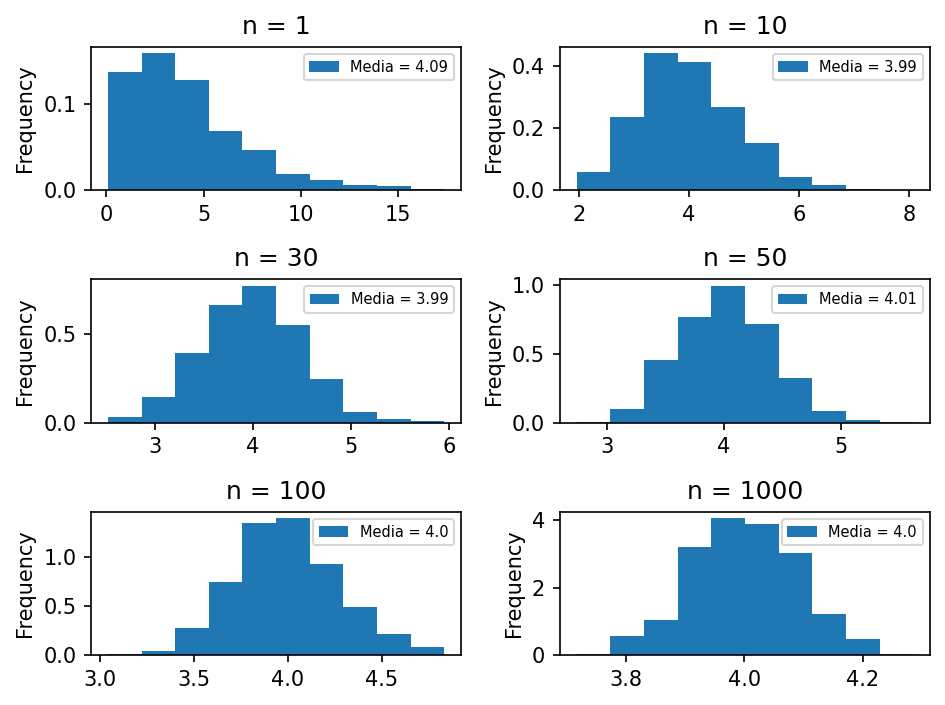

In [50]:
# Realicemos el mismo procedimiento para la distribución gamma

N = 1000
data_laplace = pd.DataFrame([])
ks = 0
plt.figure(dpi=150)
for n in sizes:
    ks +=1
    nStr = "n = " + str(n)
    Xbar = []
    for k in range(N):
        x = np.random.gamma(2, 2, size=n)
        Xbar.append(np.average(x))
    data_laplace[nStr] = Xbar
    plt.subplot(3,2,ks)
    data_laplace[nStr].plot.hist(label="Media = " + str(round(data_laplace[nStr].mean(),2)), density=True)
    plt.legend(loc="upper right", fontsize=7)
    plt.title(nStr)
plt.tight_layout()

#### 3.4 Interprete los resultados obtenidos en el ítem 2. en términos del teorema del límite central.  Se sugiere aplicar prueba de normalidad.

Además de emplear la distribución de Poisson propuesta, se llevó a cabo un análisis similar utilizando las distribuciones exponencial, hipergeométrica y gamma. Los resultados revelan que en todos los casos, a medida que aumenta el tamaño de la muestra, la distribución de la suma de las variables aleatorias tiende a acercarse a una distribución normal. Este fenómeno puede explicarse mediante el teorema del límite central, que establece que la suma de variables aleatorias independientes, incluso si no siguen una distribución normal, tiende a adoptar una distribución normal a medida que el tamaño de la muestra crece. Inicialmente, al realizar solo un muestreo, la distribución puede no parecer normal; sin embargo, a medida que se incrementa el número de muestras, se puede observar que la distribución de la suma de las variables aleatorias se aproxima a una distribución normal.

In [53]:
#Apliquemos prueba de normalidad a los datos

# Hipótesis nula: Los datos provienen de una distribución normal
# Hipótesis alternativa: Los datos no provienen de una distribución normal

# Prueba de normalidad de Shapiro-Wilk
prueba_p = pd.DataFrame([])

def prueba_Shapiro(df, distrib_name):
    for column in df:
        stat, p = stats.shapiro(df[column])
        stat = round(stat, 5)
        if p > 1e-6:  # Si el valor de p es mayor a 0.000001
            p = round(p, 5)
        else:
            p = f'{p:.5e}'  # Expresa el valor en notación científica con 5 dígitos
        prueba_p.at[distrib_name, column] = p

prueba_Shapiro(data, "Poisson")
prueba_Shapiro(data_binomial, "Exponencial")
prueba_Shapiro(data_h_geom, "Hipergeométrica")
prueba_Shapiro(data_laplace, "Gamma")

prueba_p

,n = 1,n = 10,n = 30,n = 50,n = 100,n = 1000
Poisson,8.34292e-31,2.50348e-10,0.00253,0.00155,0.06832,0.27149
Exponencial,4.66513e-33,7.23829e-11,0.00284,0.00155,0.04725,0.30597
Hipergeométrica,0.00067,0.30016,0.35635,0.21324,0.01181,0.87110
Gamma,1.09575e-24,1.89247e-09,0.02140,0.01848,0.00301,0.57047


Recordemos que la prueba de normalidad de Shapiro-Wilk es una prueba de bondad de ajuste que se utiliza para determinar si una muestra de datos proviene de una distribución normal. Si el valor p es mayor al nivel de significancia, se acepta la hipótesis nula de que los datos provienen de una distribución normal. En este caso, se observa que el valor p es mayor a 0.05, por lo que se no se rechaza la hipótesis nula y se concluye que la distribución de la suma de las variables aleatorias puede aproximarse a una distribución normal. Vemos que a medida que se aumenta el número de muestras, el p-value aumenta y para el caso de n = 1000, el p-value es superior para todas las distribuciones.

<h1 align="center">3. El problema del camino aleatorio</h1>

# 1. Cargar librerías

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 

[link text](https://)## 2. Distancia recorrida en el problema de camino aleatorio 2D
### 2.1. Método para obtener la trayectoria y graficar
En este método se implementa la obtención de la trayectoria de una partícula que [cambia su dirección en un ángulo $\theta$](https://youtu.be/2dCkhHo4TTI) después de recorrer una cierta distancia $L$.

In [39]:
def camino_aleatorio(p = 0.5, num_pasos=100, dist_paso=0.5, theta=-45, x0=0, y0=0, plot=True, show_label=True, dpi=300, title=''):
    ps = np.random.binomial(1, p, size=num_pasos)
    theta0 = theta * np.pi / 180
    x = [x0]; y = [y0]
    theta = 0
    for p in ps:
        theta += p*theta0 - (1-p)*theta0
        if np.abs(theta) >= 2*np.pi:
            theta -= 2*np.pi if theta > 0 else -2*np.pi
        cos = np.round(np.cos(theta), 3)
        sen = np.round(np.sin(theta), 3)
        x.append(x[-1] + dist_paso*cos)
        y.append(y[-1] + dist_paso*sen)
    r0 = np.r_[x[0], y[0]]
    rl = np.r_[x[-1], y[-1]]
    dr = rl-r0
    recorrido = np.linalg.norm(dr)
    if plot:
        label = r'$|\vec{r}_{fin}-\vec{r}_0|=%0.1f$ [m]' % recorrido
        plt.plot(x, y, ':k', alpha=0.4)
        if show_label:
            plt.plot([x[0], x[-1]], [y[0], y[-1]], '-ro', label=label)
        else:
            plt.plot([x[0], x[-1]], [y[0], y[-1]], '-ro')
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')
        plt.title(title)
        if show_label:
            _ = plt.legend()
    return recorrido

### 2.2. Graficar

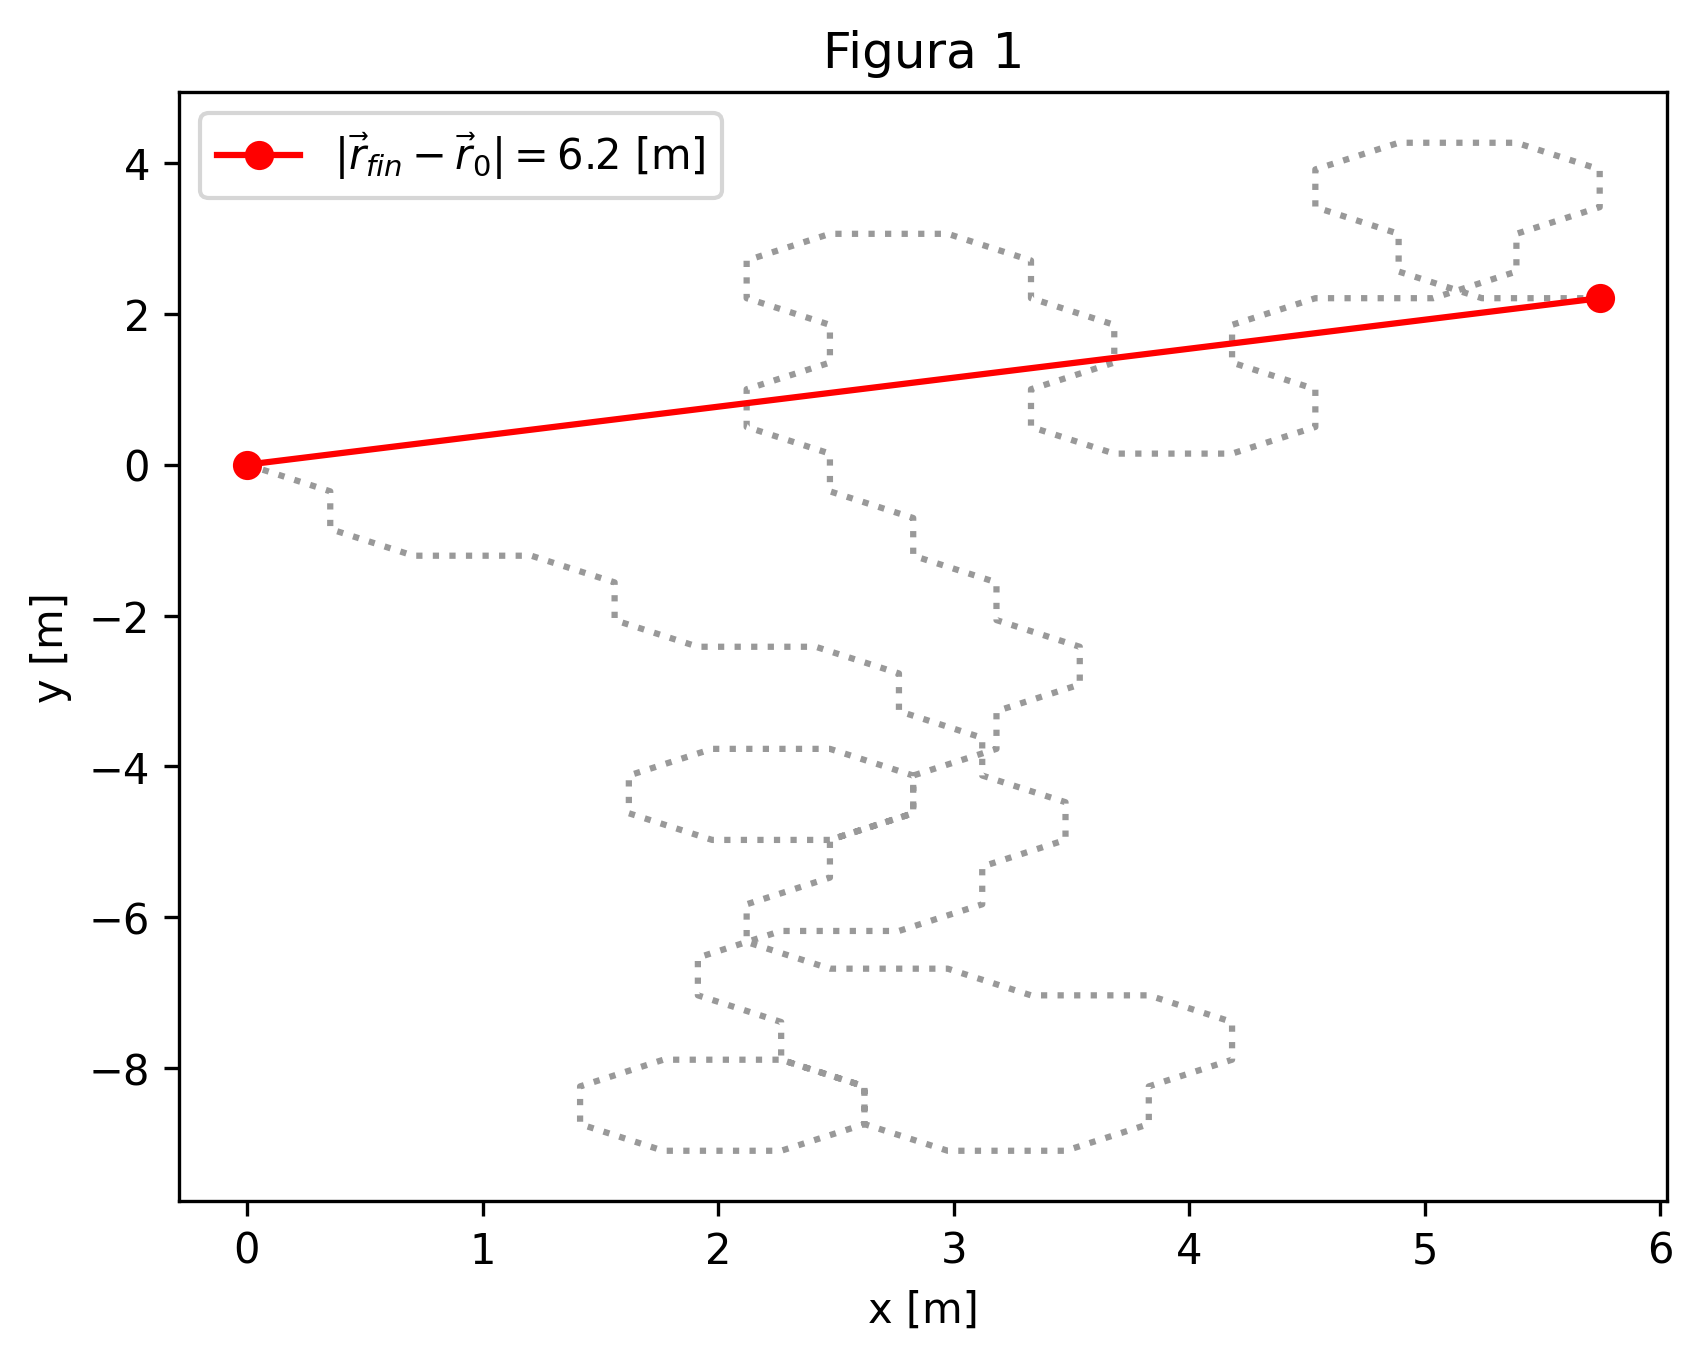

In [40]:
p = 0.5; theta = 45; dpi = 300
plt.figure(dpi=dpi)
_ = camino_aleatorio(p=p, theta=theta, title='Figura 1')

## 3. Ensamble
### 3.1. Obtención del ensamble y los primeros momentos

In [41]:
num_sistemas = 500
ensamble = [camino_aleatorio(p=p, theta=theta, plot=False) for s in range(num_sistemas)]
ensamble_mean = np.mean(ensamble)
ensamble_std  = np.std(ensamble)

[link text](https://)### 3.2. Gráfica de un 10% del ensamble

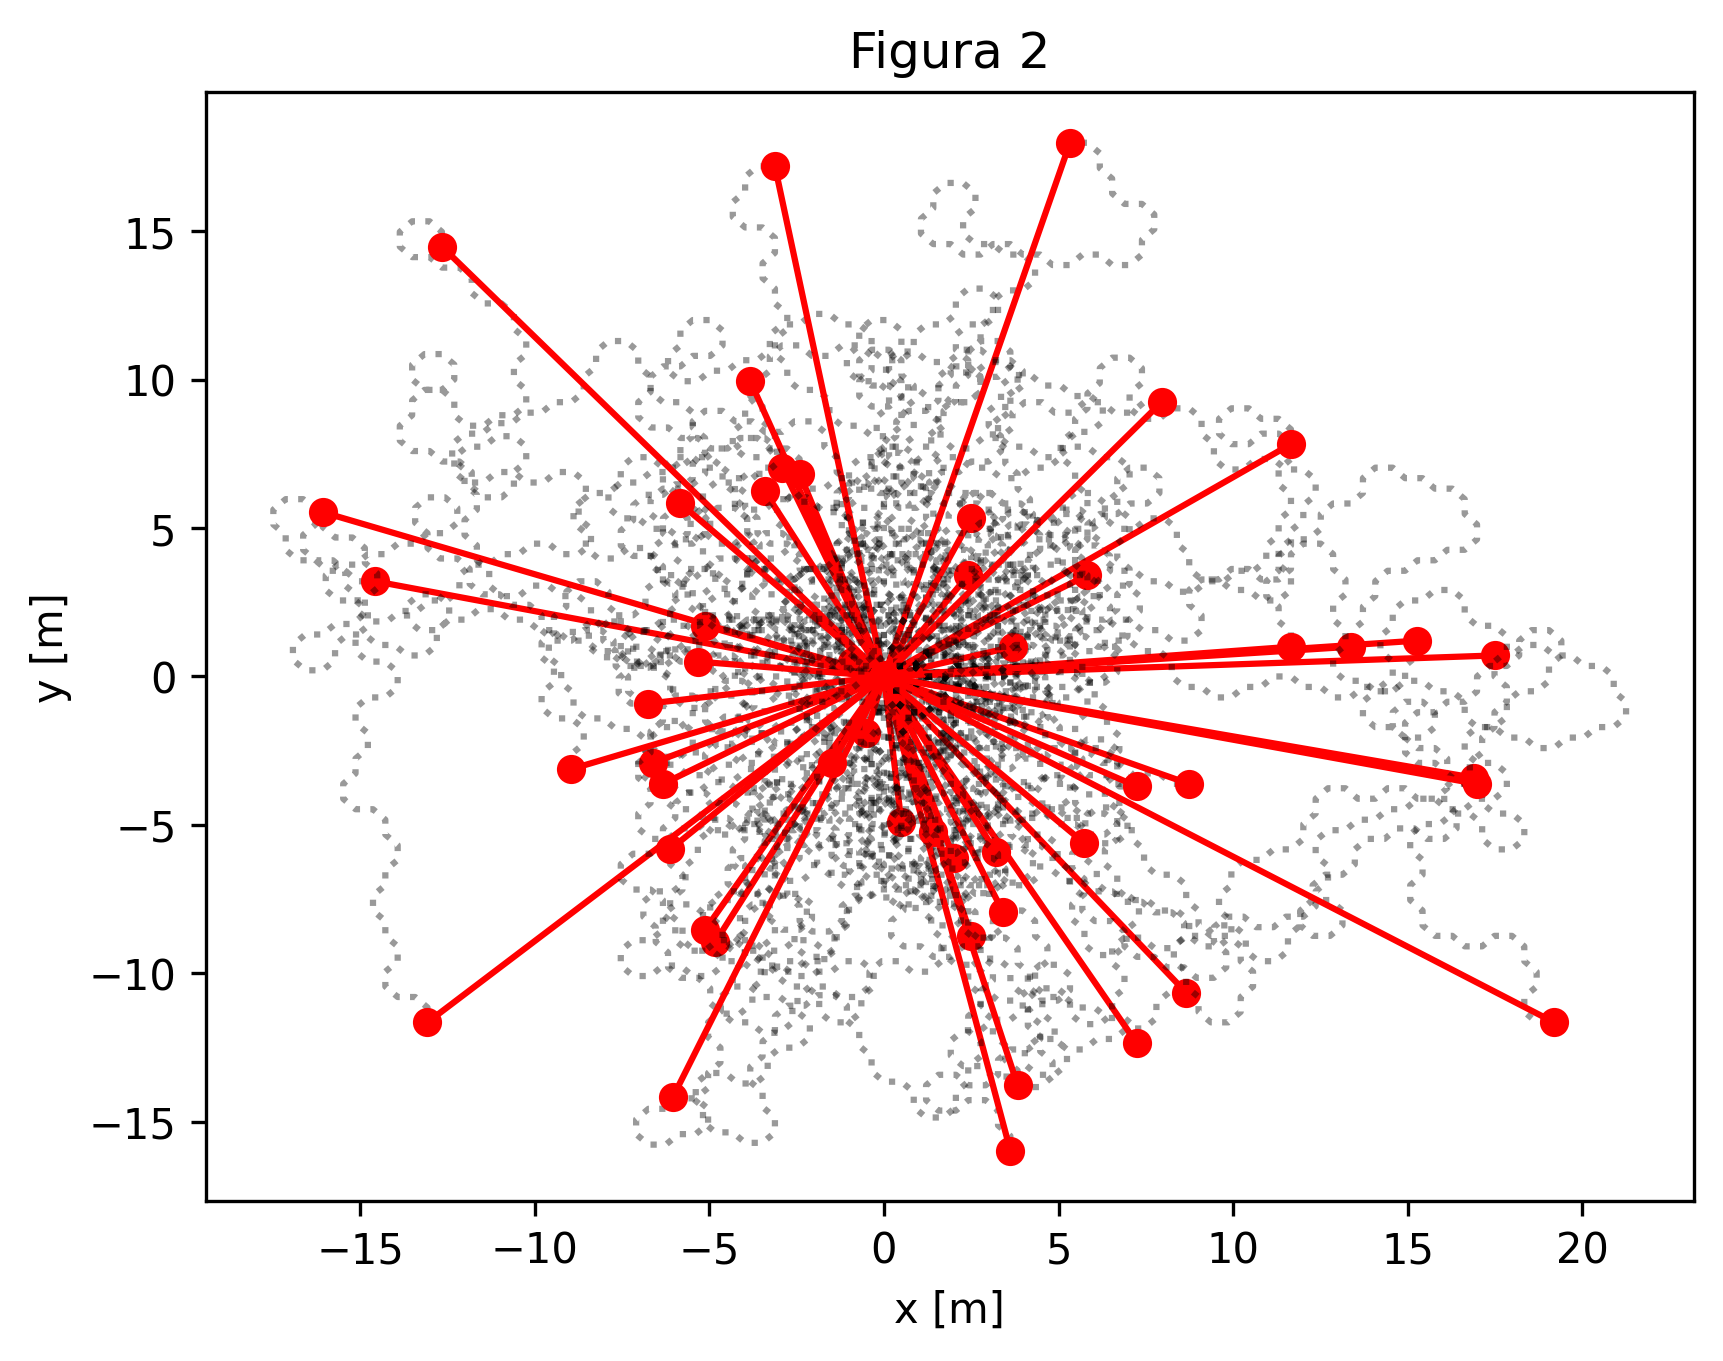

In [42]:
plt.figure(dpi=dpi)
_ = [camino_aleatorio(
        p=p, 
        theta=theta, 
        plot=True, 
        title='Figura 2',
        show_label=False) for s in range(int(num_sistemas/10))]

### 3.3. Gráfica de $|\vec{r}_{fin}-\vec{r}_0|$ para los sistemas del ensamble

1.   List item
2.   List item

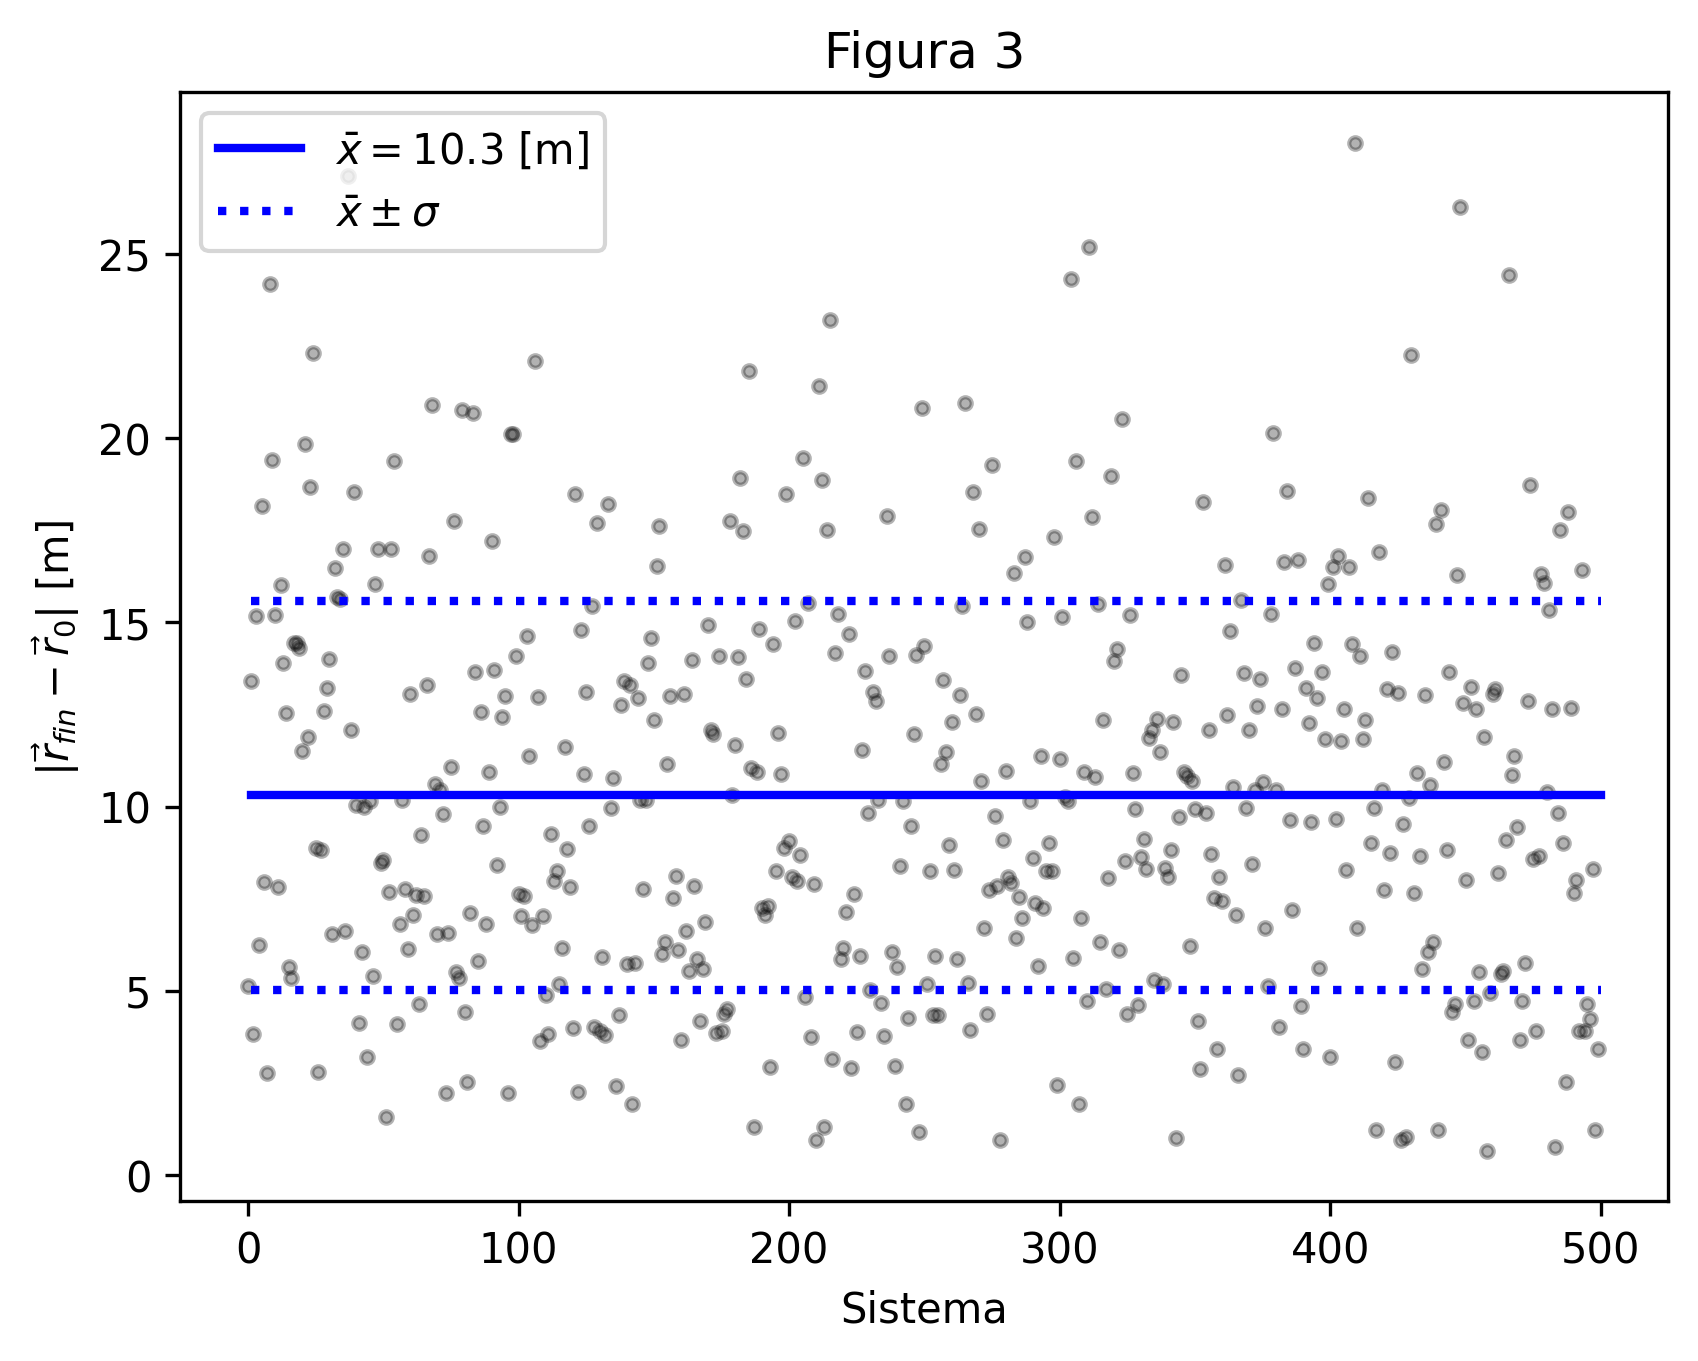

In [43]:
dpi = 300
plt.figure(dpi=dpi)
plt.plot(ensamble, '.k', alpha=0.3)
plt.plot([1, num_sistemas], 2*[ensamble_mean], 
            'b', lw=2, label=r'$\bar{x}=%0.1f$ [m]' % ensamble_mean)
plt.plot([1, num_sistemas], 2*[ensamble_mean-ensamble_std], ':b', label=r'$\bar{x}\pm\sigma$', lw=2)
plt.plot([1, num_sistemas], 2*[ensamble_mean+ensamble_std], ':b', lw=2)
plt.xlabel('Sistema')
plt.ylabel(r'$|\vec{r}_{fin}-\vec{r}_0|$ [m]')
plt.title('Figura 3')
_ = plt.legend()

[link text](https://)### 3.4. Histograma

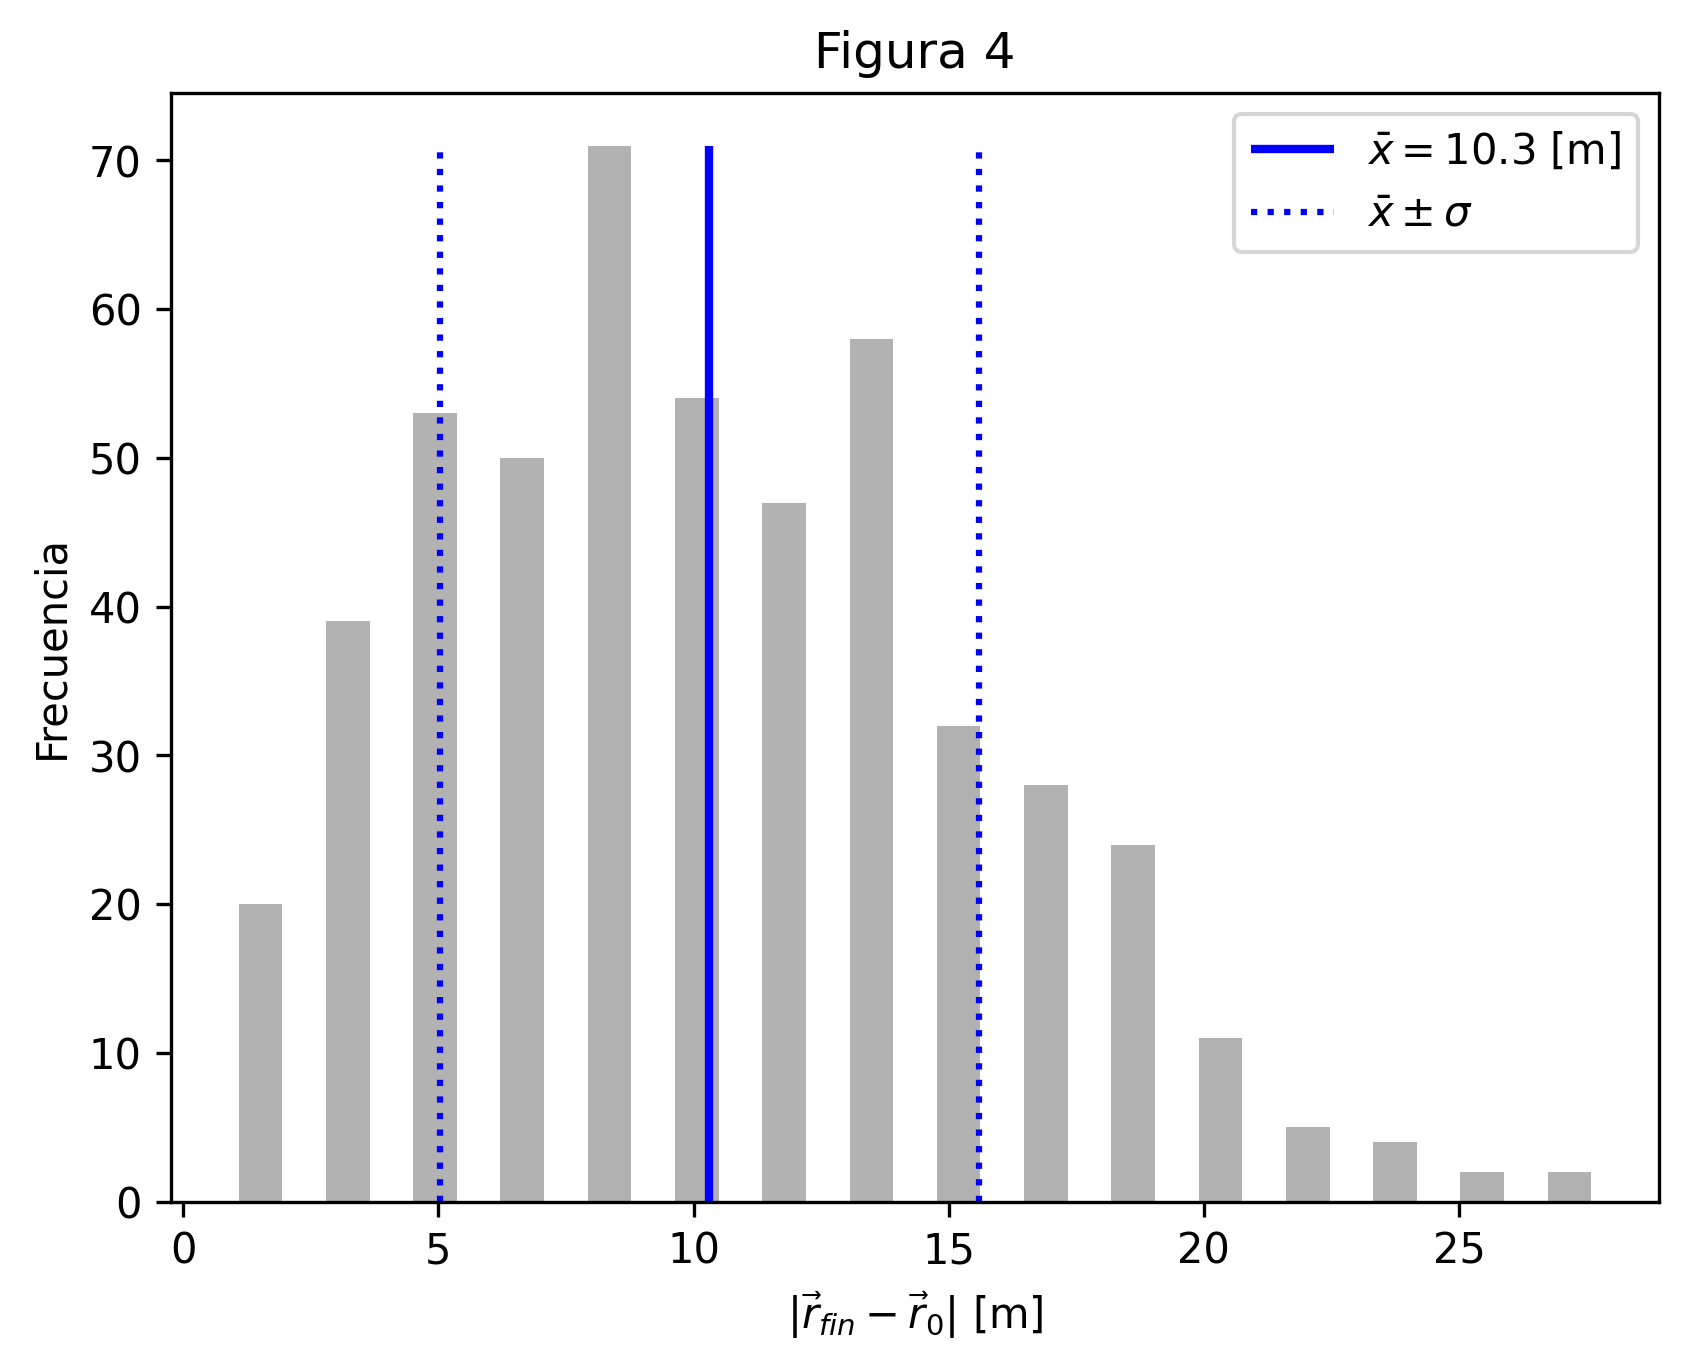

In [44]:
plt.figure(dpi=dpi)
y, x, fig = plt.hist(ensamble, bins=16, density=False, histtype='bar', rwidth=0.5, color='k', alpha=0.3)
plt.vlines(ensamble_mean, 0, max(y), color='b', lw=2, label=r'$\bar{x}=%0.1f$ [m]' % ensamble_mean)
plt.vlines(ensamble_mean+ensamble_std, 0, max(y), ls=':', color='b',label=r'$\bar{x}\pm\sigma$')
plt.vlines(ensamble_mean-ensamble_std, 0, max(y), ls=':', color='b')
plt.xlabel(r'$|\vec{r}_{fin}-\vec{r}_0|$ [m]')
plt.ylabel('Frecuencia')
plt.title('Figura 4')
_ = plt.legend()

## 4. Preguntas de autoexplicación

**4.1. ¿Cuál es el propósito de definir un ángulo *theta* en el método *camino_aleatorio*?**

El método recibe por parámetro un ángulo inicial *theta*, el cual es almacenado en radianes en la variable *theta0*, por lo que ahora, con dicha información guardada, es viable definir una nueva variable *theta* inicialmente igual a 0, de modo que en el siguiente bucle se sume sobre su valor mientras se vuelve a almacenar y con ello se va a actualizando el contenido de la variable conforme se recorre el bucle.

Ahora bien, atendiendo al contexto físico de la situación, este valor de *theta* resulta imprescindible para calcular cada nuevo paso que efectúa la partícula, pues permitirá obtener la proyección sobre los ejes vertical y horizontal de la longitud dist_paso que hace la partícula en cada iteración.



**4.2. Describa por qué varía $|\vec{r}_{fin}-\vec{r}_0|$ cuando se vuelven a ejecutar los comandos del ítem 2.2 sin variar ningún parámetro.** 

Esto es debido a la función *np.random.binomial*, la cual devuelve un array binario de manera pseudoaleatoria para la indicación de si el paso se da con un ángulo positivo o negativo. Sin embargo, si se añade np.random.seed(#valor_semilla) antes de esta línea, es posible establecer una misma semilla para la generación de los números pseudoaleatorios del array en cuestión.

**4.3. En la Figura 1, ¿cuál es el efecto de variar *p*, *theta* y volver a simular?  Explique.**

El parámetro p básicamente indica la probabilidad de éxito en una distribución binomial, por lo que al cambiar p se obtendrá un array con mayor o menor cantidad de 1 o 0 según sea el caso. Al cambiar *theta* se variará el ángulo inicial y los ángulos de los siguientes pasos serán múltiplos de este nuevo *theta*

**4.4. En el método *camino_aleatorio* (item 2.1) se define *ps* como una variable aleatoria binomial y en el ítem 3.1 se obtiene un ensamble de caminos aleatorios con el método *camino_aleatorio*.  ¿Es la media y momentos de *ps* igual a los de *ensamble*?  Describa cómo se relaciona o diferencia *ps* de *ensamble*.**

En el caso de la variable *ps*, la media y los momentos van a estar asociados a la cantidad representativa y su correspondiente desviación seǵun la probabilidad *p* de éxito, en este caso, de la cantidad de pasos considerada, la distribución de las cantidades de pasos que serán positivas (caso de 'éxito') o negativas. En cuanto al ensamble, el promedio y los momentos se van a trabajar sobre la longitud de los caminos recorridos, de modo que se conocerá la distribución de longitudes en los sistemas.    


**4.5. Describa cómo se obtiene la Figura 1.**

Dentro de la función *camino_recorrido* se ejecuta un plot con el contenido de *x* y *y*, los cuales corresponden a las listas de las diferentes posiciones adquiridas por la partícula las cuales fueron obtenidas en un bucle del tipo *for* donde se emplea el tamaño del paso y las proyecciones en cada eje de acuerdo al ángulo *theta* de cada iteración (cada uno de los paso). De igual modo, se muestra el plot de la distancia total recorrida, empleando la primera y última posición de estas mismas listas *x* y *y*. De este modo, agregando un plt.figure con una resolución dada por el parámetro dpi, se llama la función *camino_recorrido* con el fin de que al ejecutarse esta celda, se muestre la imagen tal y como se indica en el contenido esta función.

Cabe aclarar que se está dejando por defecto los valores de plot=True, show_label=True, por lo que no deben volver a indicarse al llamar a *camino_recorrido*.


**4.6. Describa el efecto observado en la Figura 2 al ejecutar los mismos comandos del ítem 3.2 varias veces sin variar ningún parámetro.**

De modo similar, dado que se está empleando un array binomial pseudoaleatorio en la función *camino_recorrido* (para la determinación del signo del ángulo en cada paso, tal y como se explicó en la pregunta 4.2), en cada interación en donde se llama esta función en el item 3.2 se van a obtener diferentes arrays binomiales, comportamiento que también se va a evidenciar en diferentes ejecuciones de dicha celda, de modo que todas las observaciones de caminos recorridos resultan diferentes, y a su vez, cada conjunto de observaciones de caminos recorrido diferirán entre sí, lo cual cambia si se declara una semilla específica (del mismo modo en que se explicó en la pregunta 4.2).


**4.7. En la Figura 2, ¿cuál es el efecto de variar *p*, *theta* y volver a simular?  Explique.**

Por una parte, debe ser tenido en cuenta que para esta figura se ha construido un ensamble de sistemas (cuya cantidad está dada por la variable *num_sistemas*), cada una con una cantidad fija de pasos (observaciones). De esta manera, al variar *p* y *theta*, esto será aplicado en cada una de las observaciones de los sistemas preparados. Ahora bien, dado que *p* me indica la probabilidad de que en cada paso el ángulo se efectúe hacia arriba o hacia abajo, de manera que al acercarse a valores extremos (cercanos a *p=0* o *p=1*) podrán apreciarse trayectorias cíclicas entre los sistemas preparados del ensamble. Asimismo, al tomar valores de *theta* menores o mayores, cada  uno de los caminos se aproximarán a curvas suaves o abruptas, respectivamente. Para valores extremos de *p* y ángulos mínimos de *theta* se podrán visualizar caminos cíclicos aproximables a circunferencias.  

**4.8. Interprete la Figura 2. Tenga el cuenta la naturaleza aleatoria del fenómeno y la distancia entre la posición final e inicial.**

Claramente cada uno de los sistemas del ensambles van a tener caminos diferentes, puesto que hay una aleatoriedad presente en la toma de decisión binaria al momento de dar la orientación del paso, sin embargo, la distribución binaria de cada uno de los sistemas posee un mismo valor de parámetro *p*, de modo que van a poder ser descritos bajo un mismo modelo de distribución binomial, por lo que puede esperarse obtener una media representativa en cuanto al tamaño del vector camino recorrido del ensamble (evidentemente, con su desviación respectiva). Esto puede asociarse visualmente en la figura 2 con la mayor densidad de vectores que se presentan a una distancia aparentemente similar desde el origen. Pese a esto, es importante resaltar que al considerar cuantitativamente la desviación estandar dada por *ensamble_std* alrededor de *ensamble_mean*, no resulta para nada despreciable, sin embargo permite caer en cuenta en la posibilidad de estudiar un comportamiento común seguido por sistemas de manera aleatoria, en donde el contexto físico permita ser analizable bajo un modelo de distribución adecuado.


**4.9. Describa todos los elementos que aparecen en las Figuras 3 y 4.**

Para el caso de la figura 3, los elementos principales corresponden a la media y la desviación estándar de los caminos recorridos en el ensamble estudiado, donde cada punto mostrado en la gráfica es entendido como cada una de las observaciones, de manera que se pueda visualizar una mayor densidad dentro de la región delimitada por las líneas horizontales que marcan la desviación alrededor de la media. 

En cuanto a la figura 4, vuelven a ser empleaos los valores de media y desviación, pero en este caso sobre una gráfica de frecencias. Se emplea una función *plt.hist*, que permite separar el conjunto de datos dado a través de una cantidad de intervalos deseados, los cuales se denominan bins. En este caso, claramente el conjunto de datos deseado corresponde a los caminos recorridos por los sistemas, de modo que cada cada intervalo (bin) se asocia con una frecuencia de aparición en las observaciones resultantes en el ensamble, visualizando así los rangos que tienen mayor frecuencia. los valores de media y desviación se muestran mediante lineas verticales, que de forma similar permiten delimitar los rangos sobre los cuales las frecuencias de observación son mayores.